In [1]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

# https://pyproj4.github.io/pyproj/dev/api/crs/crs.html
from pyproj.crs import CRS

In [2]:
pd.set_option("display.max.columns", None)

In [3]:
states = gpd.read_file('tl_2022_us_state/tl_2022_us_state.shp')
power_plants = pd.read_csv('Power_Plants.csv')

In [4]:
states.columns = states.columns.str.lower()
power_plants.columns = power_plants.columns.str.lower()

In [5]:
power_plants = gpd.GeoDataFrame(power_plants,
                    geometry=gpd.points_from_xy(power_plants.longitude, 
                                             power_plants.latitude),
                    crs='EPSG:4326'
                    )

<AxesSubplot:>

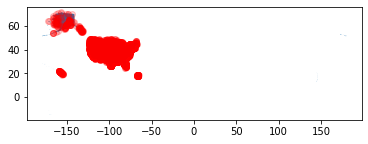

In [6]:
fig, ax = plt.subplots()
states.plot(ax=ax)
power_plants.plot(ax=ax, color='red', alpha=0.2)

In [7]:
states.dtypes

region        object
division      object
statefp       object
statens       object
geoid         object
stusps        object
name          object
lsad          object
mtfcc         object
funcstat      object
aland          int64
awater         int64
intptlat      object
intptlon      object
geometry    geometry
dtype: object

In [8]:
states.region = states.region.astype('int')
states.division = states.division.astype('int')
states.statefp = states.statefp.astype('int')
states.dtypes

region         int64
division       int64
statefp        int64
statens       object
geoid         object
stusps        object
name          object
lsad          object
mtfcc         object
funcstat      object
aland          int64
awater         int64
intptlat      object
intptlon      object
geometry    geometry
dtype: object

In [9]:
states[states.region==9]

,region,division,statefp,statens,geoid,stusps,name,lsad,mtfcc,funcstat,aland,awater,intptlat,intptlon,geometry
34,9,0,78,01802710,78,VI,United States Virgin Islands,00,G4000,A,348021909,1550236187,+18.3392359,-064.9500433,"MULTIPOLYGON (((-64.76834 18.26033, -64.77074 ..."
35,9,0,69,01779809,69,MP,Commonwealth of the Northern Mariana Islands,00,G4000,A,472292521,4644252458,+15.0010865,+145.6181702,"MULTIPOLYGON (((145.05897 14.12500, 145.06302 ..."
36,9,0,66,01802705,66,GU,Guam,00,G4000,A,543555849,934337453,+13.4417451,+144.7719021,"POLYGON ((144.56343 13.44806, 144.56357 13.450..."
41,9,0,60,01802701,60,AS,American Samoa,00,G4000,A,197759069,1307243751,-14.2671590,-170.6682674,"MULTIPOLYGON (((-170.53809 -14.33613, -170.548..."
49,9,0,72,01779808,72,PR,Puerto Rico,00,G4000,A,8869029522,4922249087,+18.2176480,-066.4107992,"MULTIPOLYGON (((-66.32322 17.87767, -66.33170 ..."


<AxesSubplot:>

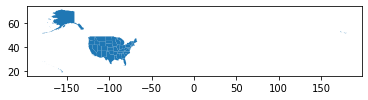

In [10]:
are_states = states[states.region.isin(range(1,5))]
are_states.region.unique()
are_states.plot()

<AxesSubplot:>

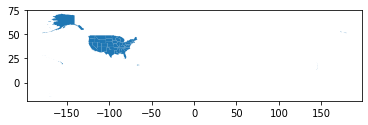

In [11]:
states.plot()

<AxesSubplot:>

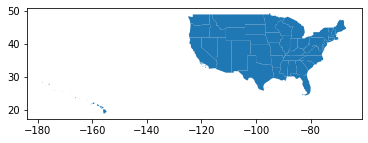

In [12]:
states[(states.statefp!=2) & (states.region!=9)].plot()

In [13]:
states.crs == power_plants.crs

False

In [14]:
states = states[states.region!=9]

In [15]:
states = states.to_crs(power_plants.crs)

print(states.crs == power_plants.crs)

True


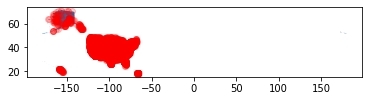

In [16]:
fig, ax = plt.subplots()
states.plot(ax=ax)
power_plants.plot(ax=ax, color='red', alpha=0.2)
plt.show()

In [17]:
bb = gpd.read_file('bounding_box.json')
bb

,geometry
0,"POLYGON ((-180.98811 71.35454, -180.98811 15.2..."


In [18]:
bb.crs == states.crs

True

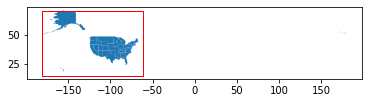

In [19]:
fig, ax = plt.subplots()
states.plot(ax=ax)
bb.plot(ax=ax, color='none', edgecolor='red')
plt.show()


<AxesSubplot:>

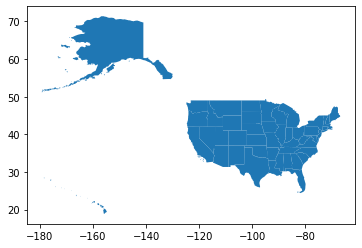

In [20]:
bb_states = states.clip(bb)
bb_states.plot()

<AxesSubplot:>

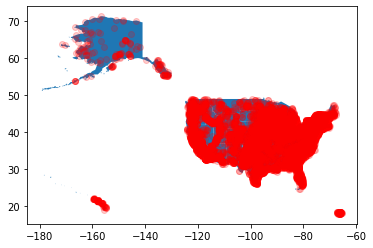

In [21]:
fig, ax = plt.subplots()
bb_states.plot(ax=ax)
power_plants.plot(ax=ax, color='red', alpha=0.2)

In [22]:
power_plants.state.unique()

array(['Alaska', 'Alabama', 'Texas', 'Minnesota', 'California',
       'Kentucky', 'Nebraska', 'New York', 'Washington', 'Arizona',
       'Kansas', 'South Carolina', 'Florida', 'Nevada', 'Utah',
       'Oklahoma', 'Arkansas', 'Illinois', 'Colorado', 'Wyoming',
       'Connecticut', 'Massachusetts', 'New Mexico', 'Vermont',
       'Delaware', 'Maryland', 'Georgia', 'Missouri', 'Hawaii', 'Idaho',
       'Maine', 'Indiana', 'North Carolina', 'Iowa', 'Louisiana',
       'Michigan', 'Wisconsin', 'Mississippi', 'Montana', 'New Hampshire',
       'New Jersey', 'North Dakota', 'Ohio', 'Oregon', 'Pennsylvania',
       'Rhode Island', 'South Dakota', 'Tennessee', 'Virginia',
       'West Virginia', 'District of Columbia', 'Puerto Rico'],
      dtype=object)

In [23]:
power_plants.primsource.unique()

array(['petroleum', 'hydroelectric', 'natural gas', 'nuclear', 'coal',
       'pumped storage', 'geothermal', 'wind', 'biomass', 'batteries',
       'other', 'solar'], dtype=object)

In [24]:
power_plants = power_plants[power_plants.state != 'Puerto Rico']

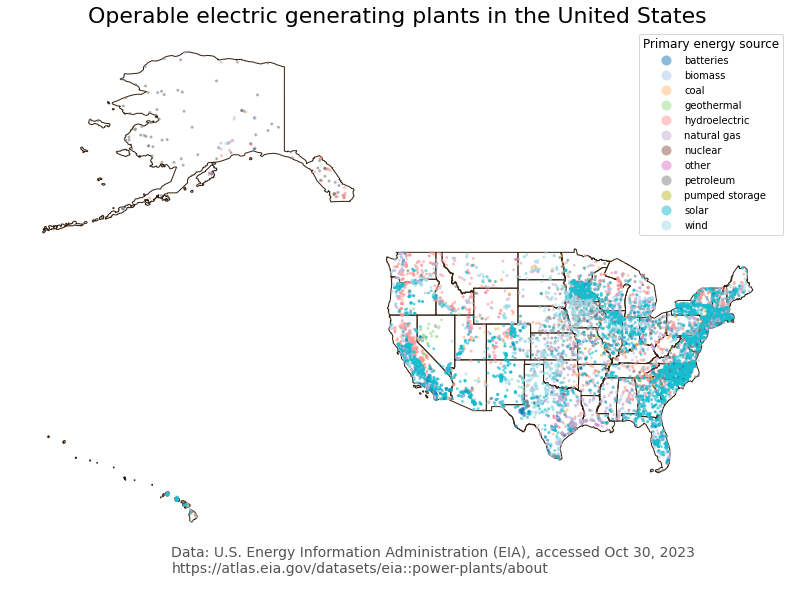

In [25]:
fig, ax = plt.subplots(figsize=(14, 10))

# remove the axis box around the map
ax.axis('off')
# annotate the data source
ax.annotate("Data: U.S. Energy Information Administration (EIA), accessed Oct 30, 2023 \nhttps://atlas.eia.gov/datasets/eia::power-plants/about", 
            xy=(0.17, .06), 
            xycoords='figure fraction', 
            fontsize=14, 
            color='#555555')

# update title
ax.set_title('Operable electric generating plants in the United States',
fontsize=22)

# add states 
bb_states.plot(ax=ax,
               color='none',
               edgecolor = '#362312')

# add electric power plants colored by energy source
power_plants.plot(ax=ax, 
                  column='primsource',
                  legend=True,
                  markersize = 4,
                  cmap='tab20',
                  alpha=0.5,
                  # adjust legend location
                  legend_kwds={'loc': "upper right", 
                                'title':'Primary energy source',
                                'title_fontsize':'large', 
                        'fontsize':'medium'})

leg = ax.get_legend()

#plt.legend(prop = {'size' : 20})


# ax.legend(fontsize=15,
#           frameon=False)

In [26]:
gpd.show_versions()


SYSTEM INFO
-----------
python     : 3.9.7 | packaged by conda-forge | (default, Sep 23 2021, 07:31:23)  [Clang 11.1.0 ]
executable : /Users/galaz-garcia/opt/anaconda3/envs/gee_env/bin/python
machine    : macOS-13.5.2-x86_64-i386-64bit

GEOS, GDAL, PROJ INFO
---------------------
GEOS       : 3.11.2
GEOS lib   : None
GDAL       : 3.6.4
GDAL data dir: /Users/galaz-garcia/opt/anaconda3/envs/gee_env/lib/python3.9/site-packages/fiona/gdal_data
PROJ       : 9.3.0
PROJ data dir: /Users/galaz-garcia/opt/anaconda3/envs/gee_env/lib/python3.9/site-packages/pyproj/proj_dir/share/proj

PYTHON DEPENDENCIES
-------------------
geopandas  : 0.14.0
numpy      : 1.26.1
pandas     : 2.1.2
pyproj     : 3.6.1
shapely    : 2.0.2
fiona      : 1.9.5
geoalchemy2: None
geopy      : None
matplotlib : 3.4.3
mapclassify: None
pygeos     : None
pyogrio    : None
psycopg2   : None
pyarrow    : None
rtree      : None


In [27]:
pip list

Package                  Version
------------------------ -----------
aiohttp                  3.7.4.post0
anyio                    3.3.1
appnope                  0.1.2
argon2-cffi              21.1.0
async-generator          1.10
async-timeout            3.0.1
attrs                    21.2.0
Babel                    2.9.1
backcall                 0.2.0
beautifulsoup4           4.10.0
bleach                   4.1.0
bqplot                   0.12.30
branca                   0.4.2
brotlipy                 0.7.0
cachetools               4.2.2
certifi                  2021.10.8
cffi                     1.14.6
cftime                   1.5.0
chardet                  4.0.0
charset-normalizer       2.0.0
click                    8.0.1
click-plugins            1.1.1
cligj                    0.7.2
colour                   0.1.5
cryptography             3.4.7
cycler                   0.10.0
debugpy                  1.4.3
decorator                5.1.0
defusedxml               0.7.1
earthengine-api